___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

## Business Understanding

This is a "***Classification***" project.

The goal of this project is to predict whether customers recommend the product they purchased using ***Age***, ***Rating***, and ***Positive Fedback Count*** variables.

The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews).

The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 

Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

In this version of this project, since our target variable is ***IMBALANCED (.82% vs .18%)***, ***SMOTE*** balnacing is applied to dataset. Then, different ML algoritms are conducted to predict whether customers recommend the product or not.

## Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [74]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

!pip install imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.metrics import f1_score
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter

from wordcloud import WordCloud

from warnings import filterwarnings
filterwarnings('ignore')

nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sedat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sedat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sedat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [75]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', index_col = 0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [76]:
df.shape

(23486, 10)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


#### Missing Values

In [78]:
def missing_values(df):
    nv=pd.concat([df.isnull().sum(), 100 * df.isnull().sum()/df.shape[0]],axis=1).rename(columns={0:'Missing_Records', 1:'Percentage (%)'})
    return nv[nv.Missing_Records>0].sort_values('Missing_Records', ascending=False)
missing_values(df)

,Missing_Records,Percentage (%)
Title,3810,16.222430
Review Text,845,3.597888
Division Name,14,0.059610
Department Name,14,0.059610
Class Name,14,0.059610


#### Checking Duplicates

In [79]:
df[df.duplicated()]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
493,1104,39,NaN,NaN,5,1,0,General,Dresses,Dresses
2959,1094,30,NaN,NaN,5,1,0,General,Dresses,Dresses
4850,829,66,NaN,NaN,5,1,0,General Petite,Tops,Blouses
5671,861,34,NaN,NaN,5,1,0,General,Tops,Knits
5776,868,61,NaN,NaN,5,1,0,General,Tops,Knits
9306,834,70,NaN,NaN,5,1,0,General Petite,Tops,Blouses
9413,1094,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses
9430,1094,36,NaN,NaN,5,1,0,General Petite,Dresses,Dresses
10787,1078,35,NaN,NaN,5,1,0,General,Dresses,Dresses
14129,862,38,NaN,NaN,5,1,0,General Petite,Tops,Knits


In [80]:
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)

In [81]:
df.shape

(23465, 10)

#### Description of Data Frame

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Clothing ID,23465.0,918.096825,203.362035,0.0,861.0,936.0,1078.0,1205.0
Age,23465.0,43.200128,12.280712,18.0,34.0,41.0,52.0,99.0
Rating,23465.0,4.195355,1.110278,1.0,4.0,5.0,5.0,5.0
Recommended IND,23465.0,0.822203,0.382350,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,23465.0,2.538206,5.704248,0.0,0.0,1.0,3.0,122.0


#### Check Proportion of Target Class Variable

In [83]:
df['Recommended IND'].value_counts(normalize = True)

1    0.822203
0    0.177797
Name: Recommended IND, dtype: float64

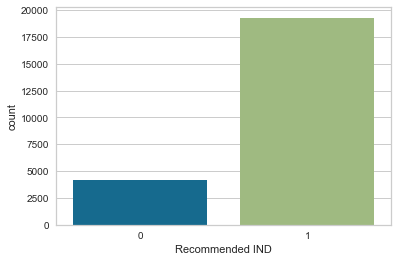

In [84]:
sns.countplot(df['Recommended IND']);

The target class variable is imbalanced

## Balance with SMOTE

In [85]:
df_rating = df[['Age', 'Rating', 'Positive Feedback Count', 'Recommended IND']]
df_rating = df_rating.rename(columns={"Recommended IND": "Recommended", "Age": "Age", "Positive Feedback Count": "Positive Feedback", "Rating": "Rating"})
df_rating.head()

,Age,Rating,Positive Feedback,Recommended
0,33,4,0,1
1,34,5,4,1
2,60,3,0,0
3,50,5,0,1
4,47,5,6,1


In [86]:
sm = SMOTE(random_state=42)
X_smoted, y_smoted = sm.fit_sample(df_rating[['Age', 'Rating', 'Positive Feedback']], df_rating['Recommended'])
print('y_smoted dataset shape {}'.format(Counter(y_smoted)))

y_smoted dataset shape Counter({1: 19293, 0: 19293})


In [87]:
df_smoted = pd.DataFrame(X_smoted, y_smoted).reset_index()
df_smoted.head()

,Recommended,Age,Rating,Positive Feedback
0,1,34,5,4
1,1,34,5,4
2,0,33,4,0
3,1,34,5,4
4,1,34,5,4


In [88]:
df_smoted['Recommended'].value_counts(normalize = True)

1    0.5
0    0.5
Name: Recommended, dtype: float64

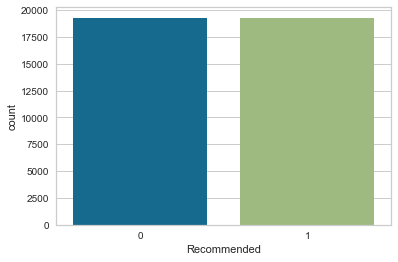

In [90]:
sns.countplot(df_smoted['Recommended']);

In [89]:
df_smoted.shape

(38586, 4)

### Classification with Age, Rating, and Positive Feddback

In [26]:
X = X_smoted
y = y_smoted
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

### Logistic Regression

In [27]:
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

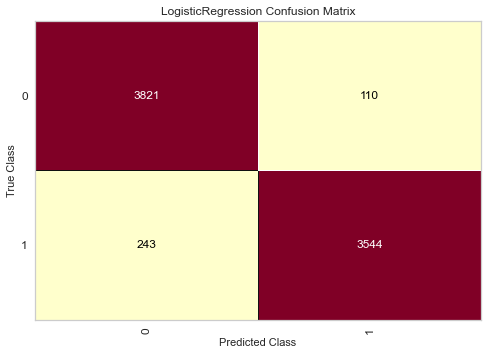

In [28]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(log_reg)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

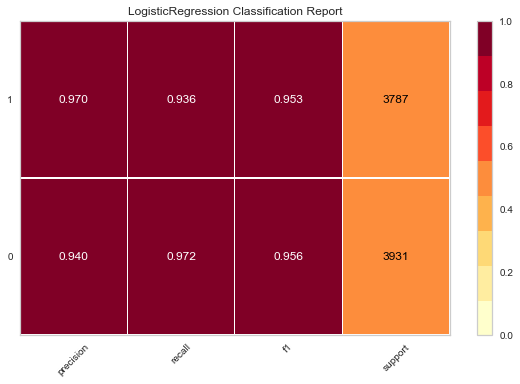

In [29]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(log_reg, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

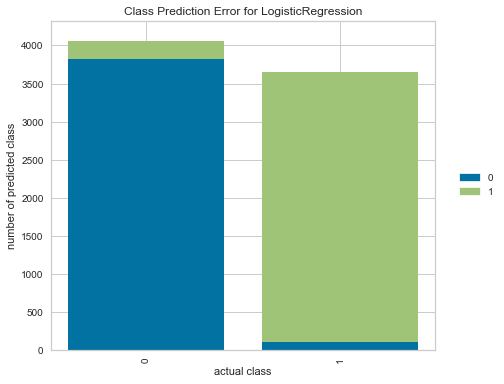

In [30]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(linear_model.LogisticRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [31]:
log_reg = linear_model.LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
log_reg_accuracy = model_selection.cross_val_score(log_reg,X_test,y_test,cv = 10).mean()
print("Count Vectors Accuracy:", log_reg_accuracy)

Count Vectors Accuracy: 0.9541338212267225


In [32]:
log_reg_f1 = f1_score(y_test, y_pred, average='weighted')
log_reg_f1

0.9542344385704452

### Decision Tree

In [33]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt.predict(X_test)

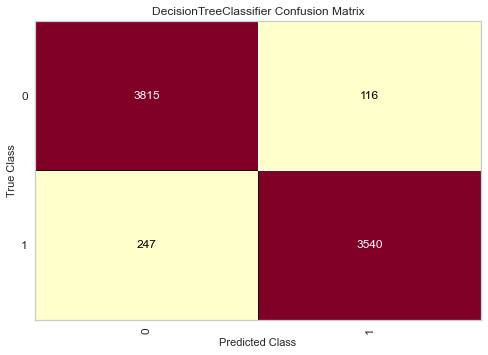

In [34]:
cm = ConfusionMatrix(dt)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

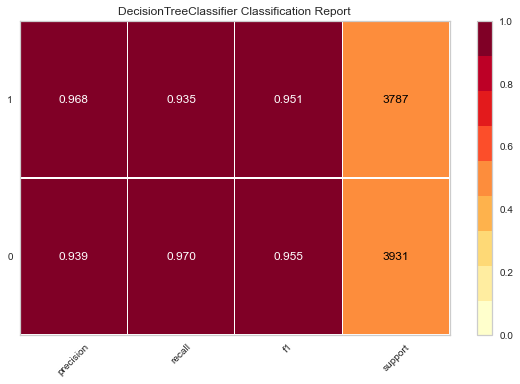

In [35]:
visualizer = ClassificationReport(dt, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

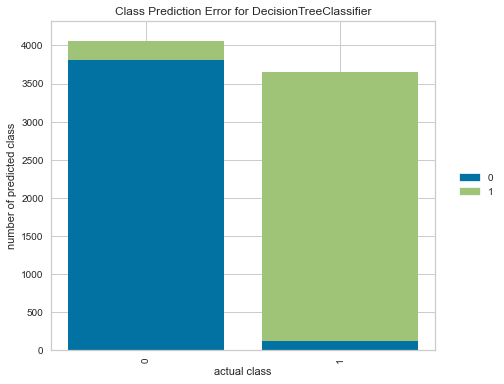

In [36]:
visualizer = ClassPredictionError(DecisionTreeClassifier())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [37]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_accuracy = model_selection.cross_val_score(dt,X_test,y_test,cv = 10).mean()
print("Count Vectors Accuracy:", dt_accuracy)

Count Vectors Accuracy: 0.9481742639597319


In [38]:
dt_f1 = f1_score(y_test, y_pred, average='weighted')
dt_f1

0.9529386093935106

### Random Forests

In [39]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)

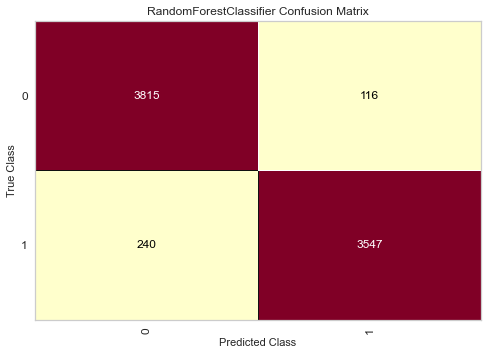

In [40]:
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

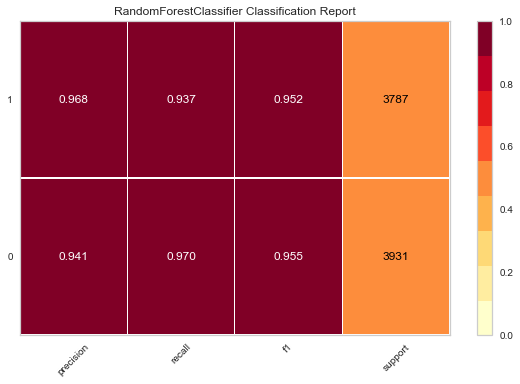

In [41]:
visualizer = ClassificationReport(rf, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

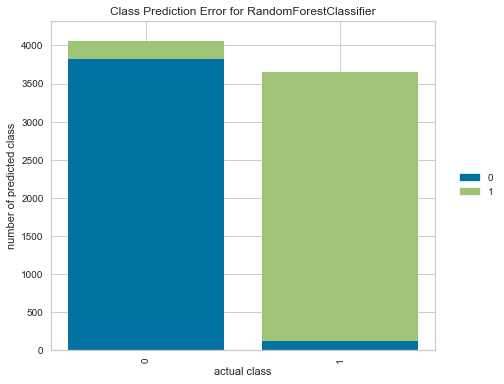

In [42]:
visualizer = ClassPredictionError(RandomForestClassifier())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [43]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_accuracy = model_selection.cross_val_score(rf,X_test,y_test,cv = 10).mean()
print("Count Vectors Accuracy:", rf_accuracy)

Count Vectors Accuracy: 0.9520607783445227


In [44]:
rf_f1 = f1_score(y_test, y_pred, average='weighted')
rf_f1

0.9537189610690165

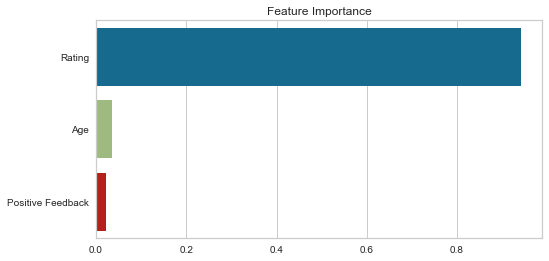

In [45]:
plt.figure(figsize=(8,4))
feature_imp = pd.Series(rf.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show();

### XGBoost 

In [46]:
xgb = XGBClassifier().fit(X_train, y_train)
y_pred = xgb.predict(X_test)

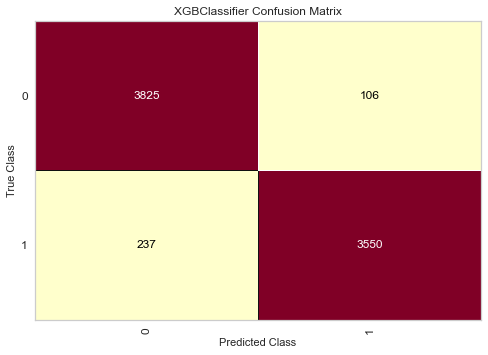

In [47]:
cm = ConfusionMatrix(xgb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

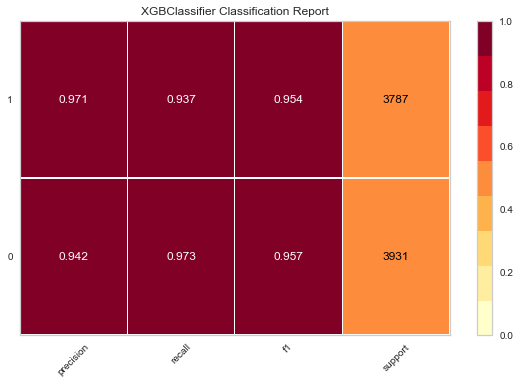

In [48]:
visualizer = ClassificationReport(xgb, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

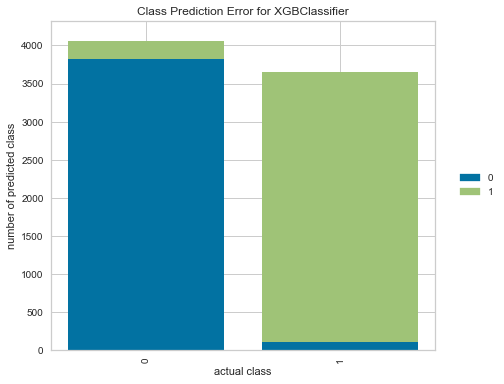

In [49]:
visualizer = ClassPredictionError(XGBClassifier())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [50]:
xgb = XGBClassifier().fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_accuracy = model_selection.cross_val_score(xgb,X_test,y_test,cv = 10).mean()
print("Count Vectors Accuracy:", xgb_accuracy)

Count Vectors Accuracy: 0.9538744178544787


In [51]:
xgb_f1 = f1_score(y_test, y_pred, average='weighted')
xgb_f1

0.9555315234765126

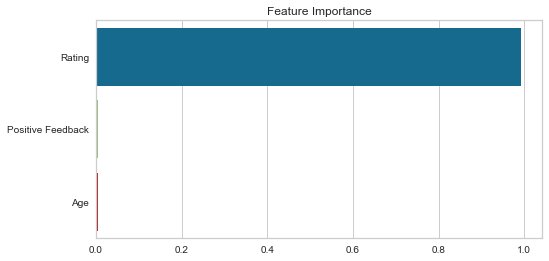

In [52]:
plt.figure(figsize=(8,4))
feature_imp = pd.Series(xgb.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show();

### KNeigborsClassifier

In [53]:
knn = KNeighborsClassifier().fit(X_train, y_train)
knn_params = {"n_neighbors": np.arange(1,15)}
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)
knn_cv_model.best_params_

{'n_neighbors': 9}

In [54]:
knn_final = KNeighborsClassifier(**knn_cv_model.best_params_).fit(X_train, y_train)
y_pred = knn_final.predict(X_test)

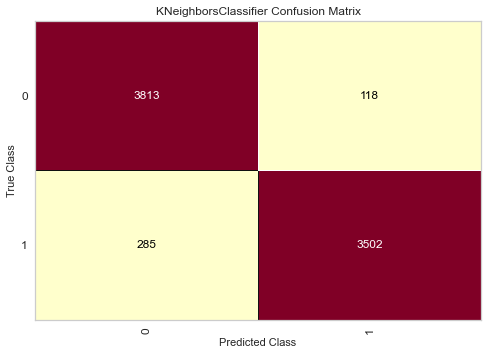

In [55]:
cm = ConfusionMatrix(knn_final)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

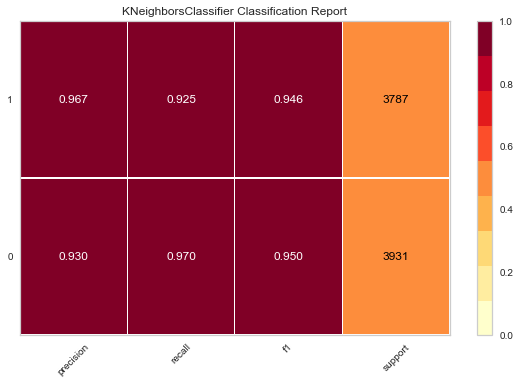

In [56]:
visualizer = ClassificationReport(knn_final, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

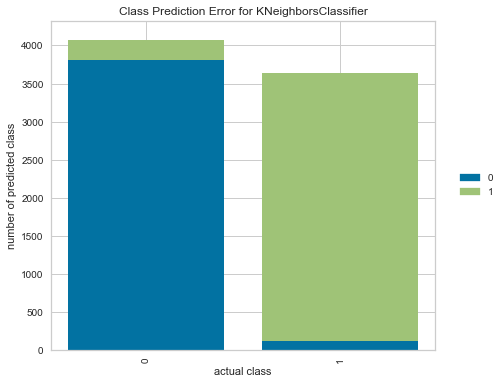

In [57]:
visualizer = ClassPredictionError(KNeighborsClassifier())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

In [58]:
knn_final = KNeighborsClassifier(**knn_cv_model.best_params_).fit(X_train, y_train)
y_pred = knn_final.predict(X_test)
knn_accuracy = model_selection.cross_val_score(knn_final,X_test,y_test,cv = 10).mean()
print("Count Vectors Accuracy:", knn_accuracy)

Count Vectors Accuracy: 0.9423428963125744


In [59]:
knn_f1 = f1_score(y_test, y_pred, average='weighted')
knn_f1

0.947738799212544

### Comparison of Model Accuracies

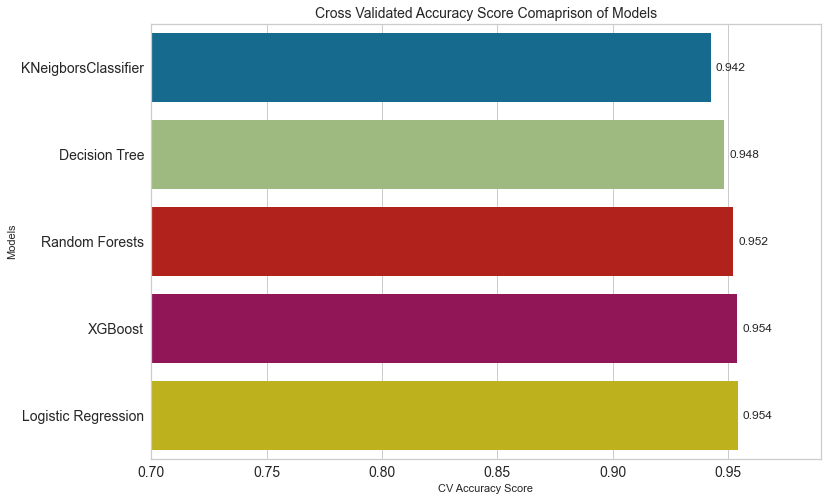

In [60]:
compare = pd.DataFrame({"Models": ["Logistic Regression", "Decision Tree", "Random Forests", "XGBoost", "KNeigborsClassifier"],
                        "CV Accuracy Score": [log_reg_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, knn_accuracy]})
compare = compare.sort_values(by="CV Accuracy Score", ascending=True)
plt.figure(figsize=(12,8))
ax = sns.barplot(x="CV Accuracy Score", y="Models", data=compare)
ax.set_xlim(.70, .99)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Cross Validated Accuracy Score Comaprison of Models", size=14);

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center");

### Comparison of Models F1 Scores

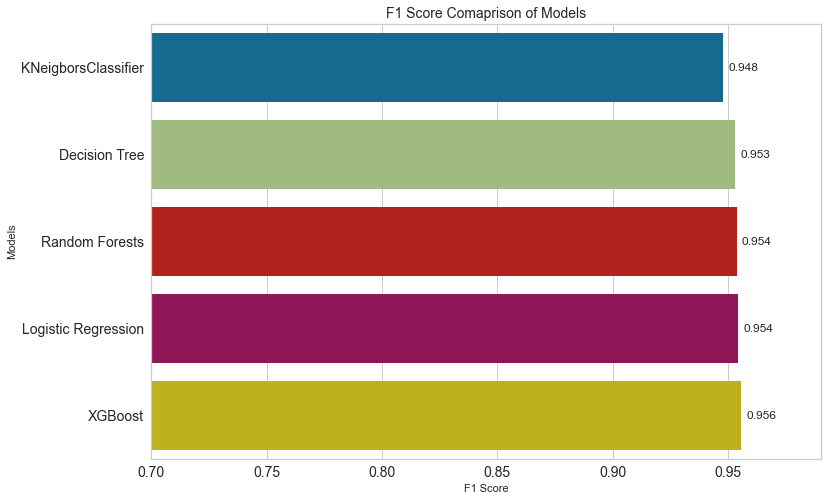

In [61]:
compare = pd.DataFrame({"Models": ["Logistic Regression", "Decision Tree", "Random Forests", "XGBoost", "KNeigborsClassifier"],
                        "F1 Score": [log_reg_f1, dt_f1, rf_f1, xgb_f1, knn_f1]})
compare = compare.sort_values(by="F1 Score", ascending=True)
plt.figure(figsize=(12,8))
ax = sns.barplot(x="F1 Score", y="Models", data=compare)
ax.set_xlim(.70, .99)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("F1 Score Comaprison of Models", size=14);

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center");

### Conclusion

Since our target avribale is imbalanced, smote balancing is applied to our data and 5 different Classification models are trained. In terms of cross validated Accuracy Scores, Logistic Regression is the best performing model. XGBoost is the best model to predict whether customers recommend the product or not in terms of F1 Scores.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___